In [1]:
import numpy as np
import pandas as pd
import pandas_market_calendars as mcal
import matplotlib.pyplot as plt
import seaborn as sns

from utils import dibuja_covar, dibuja_covar_ax

import utils_sim_mercado as sim

plt.style.use('ggplot')

In [2]:
num_dias = 1000
start_date = '2019-01-01'
businees_days = sim.generate_business_dates(num_dias, start_date)

#### Prueba inicial con dos activos

In [7]:
# Parámetros de los activos
med1 = 0.03/252  # Media del primer activo
std1 = 0.1/np.sqrt(252)  # Desviación estándar del primer activo

med2 = 0.1/252  # Media del segundo activo
std2 = 0.2/np.sqrt(252)  # Desviación estándar del segundo activo

precios_ini_2 = [102, 87]

corr12 = 0.4 

In [10]:
med_lst_2 = [med1, med2]
std_lst_2 = [std1, std2]
corr_mat_2 = np.array([[1, corr12], [corr12, 1]])


In [17]:
std_lst_2

[0.00629940788348712, 0.01259881576697424]

In [12]:
ret_sim_2 = sim.simular_retornos_diarios(med_lst_2, std_lst_2, corr_mat_2, num_dias)

ret_sim__2_df = pd.DataFrame(ret_sim_2, index=businees_days, columns=[f"activo_{i}" for i in range(2)])

precios_2_df = sim.calcular_precios(ret_sim__2_df, precios_ini_2)

<Axes: >

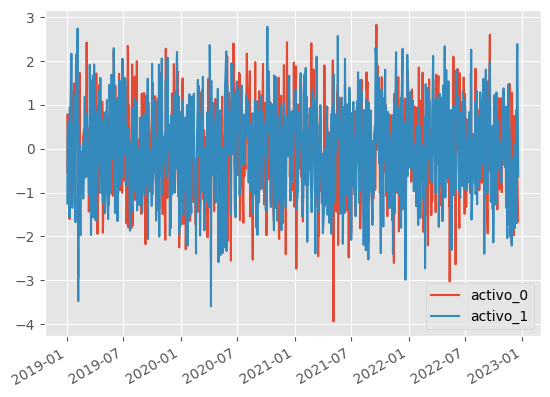

In [14]:
ret_sim__2_df.plot()

In [6]:
num_activos = 10

med_min = 0.07/252
med_max = 0.25/252

vol_min = 0.05/np.sqrt(252)
vol_max = 0.30/np.sqrt(252)

precio_min = 80
precio_max = 120

np.random.seed(1234)

precios_ini = np.random.uniform(precio_min, precio_max, num_activos)

corr_tipo = "mixta"

med_lst, std_lst, corr_mat  = sim.generar_datos(num_activos, (med_min, med_max) , (vol_min, vol_max), corr_tipo)

#ret_sim_df = pd.DataFrame(ret_sim, index=businees_days, columns=[f"activo_{i}" for i in range(num_activos)])


cov_mat =sim.calcular_matriz_covarianza(med_lst, std_lst, corr_mat)

ret_sim = sim.simular_retornos_diarios(med_lst, std_lst, cov_mat, num_dias)

ret_sim_df = pd.DataFrame(ret_sim, index=businees_days, columns=[f"activo_{i}" for i in range(num_activos)])

precios_df = sim.calcular_precios(ret_sim_df, precios_ini)


/home/alfonso/Desktop/universidad/Python-aplicado-gestion-carteras/source/utils_sim_mercado.py:301: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  retornos = np.random.multivariate_normal(media_lst, cov_mat, num_dias)


<Axes: >

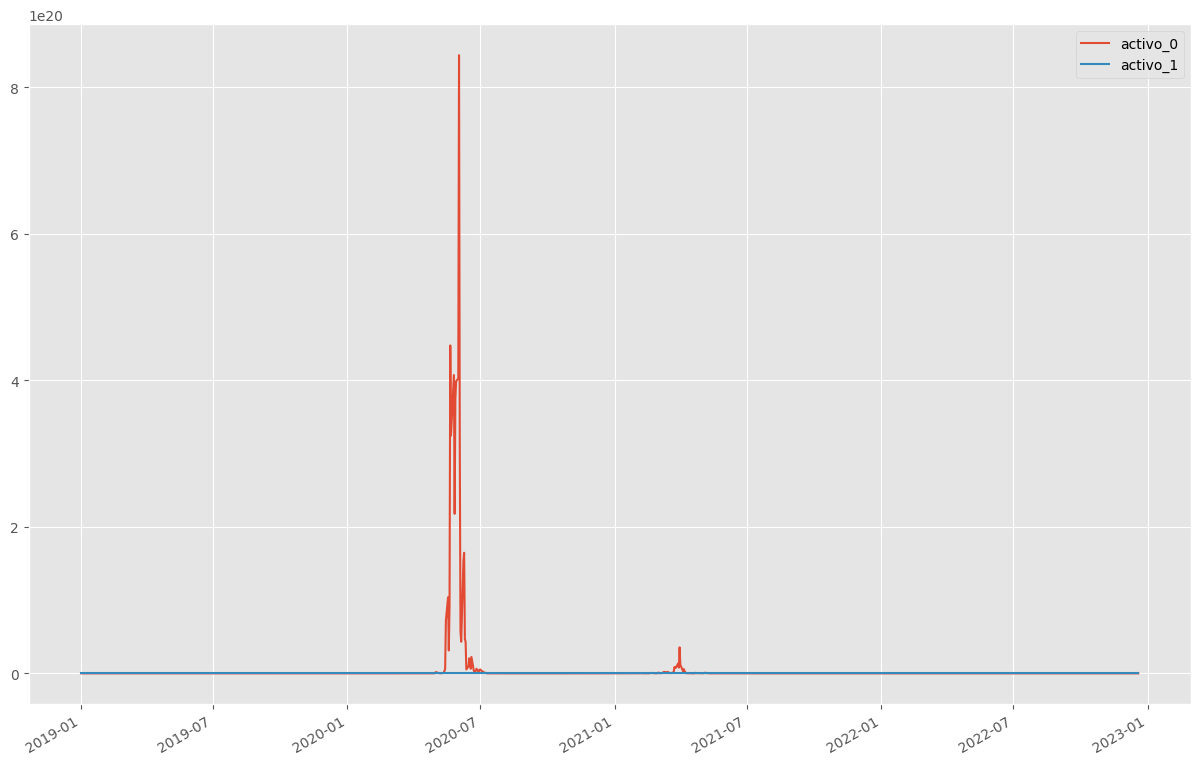

In [18]:
precios_df.plot(figsize=(15, 10))

In [7]:
start_date_baj = precios_df.index.values[-1] + np.timedelta64(1, 'D')
businees_days_baja = sim.generate_business_dates(num_dias, start_date_baj)

med_norm_lst = list(np.mean(ret_sim, axis=0))
std_norm_lst = list(np.std(ret_sim, axis=0))
corr_norm_mat = np.corrcoef(ret_sim, rowvar=False)

med_baj_lst, std_baja_lst, corr_baj_mat = sim.simular_evento_bajista(med_norm_lst,
                                                                     std_norm_lst,
                                                                     corr_norm_mat,
                                                                     impacto_medias = 0.8,
                                                                     impacto_vol = 0.4,
                                                                     impacto_corr = 0.7)

cov_baj_mat =sim.calcular_matriz_covarianza(med_baj_lst, std_baja_lst, corr_baj_mat)

ret_sim_baja = sim.simular_retornos_diarios(med_baj_lst, std_baja_lst, cov_baj_mat, num_dias)

ret_sim_baja_df = pd.DataFrame(ret_sim_baja, index=businees_days_baja, columns=[f"activo_{i}" for i in range(num_activos)])

precios_baja_ini = precios_df.iloc[-1].values

precios_baja_df = sim.calcular_precios(ret_sim_baja_df, precios_baja_ini)

TypeError: simular_evento_bajista() got an unexpected keyword argument 'impacto_corr'

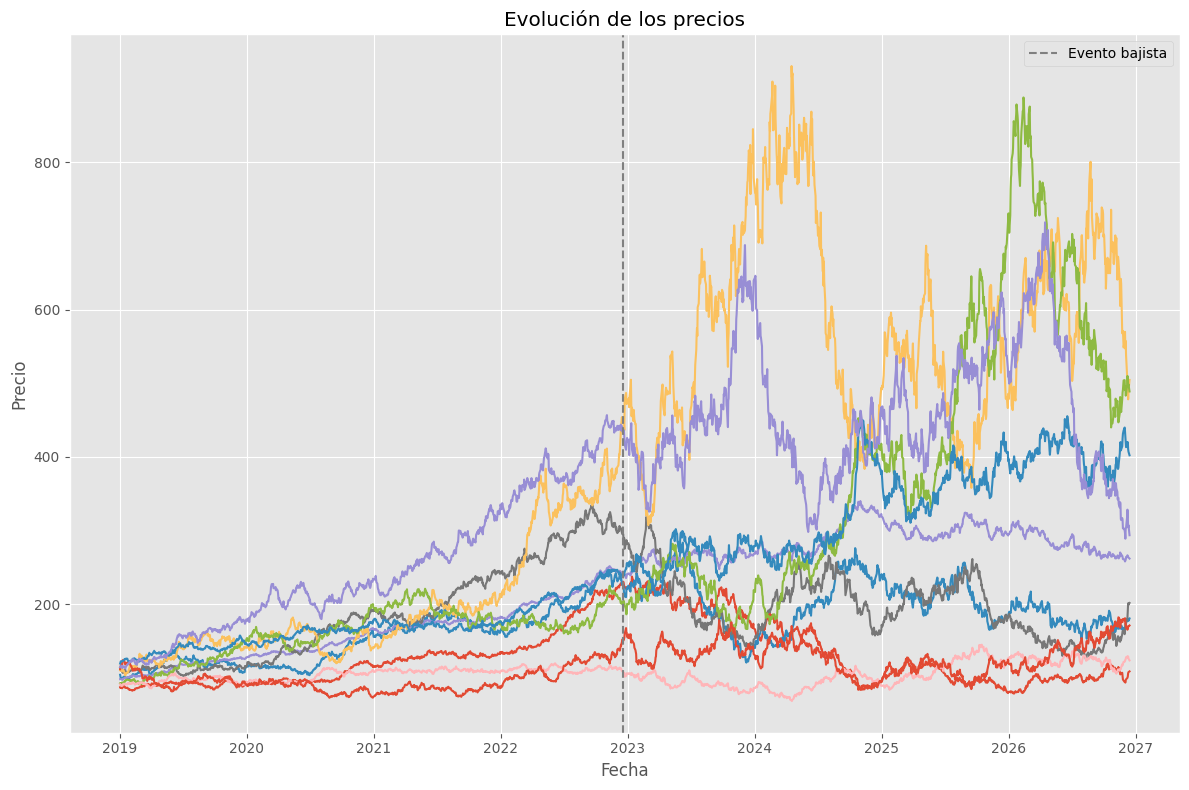

In [ ]:
# Concatenar ambos DataFrames
precios_total_df = pd.concat([precios_df, precios_baja_df])

# Representar los precios
plt.figure(figsize=(12, 8))
for columna in precios_total_df.columns:
    plt.plot(precios_total_df.index, precios_total_df[columna])

    # Añadir línea vertical en el último día de precios_df
ultimo_dia = precios_df.index[-1]
plt.axvline(x=ultimo_dia, color='gray', linestyle='--', label='Evento bajista')


plt.title("Evolución de los precios")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()






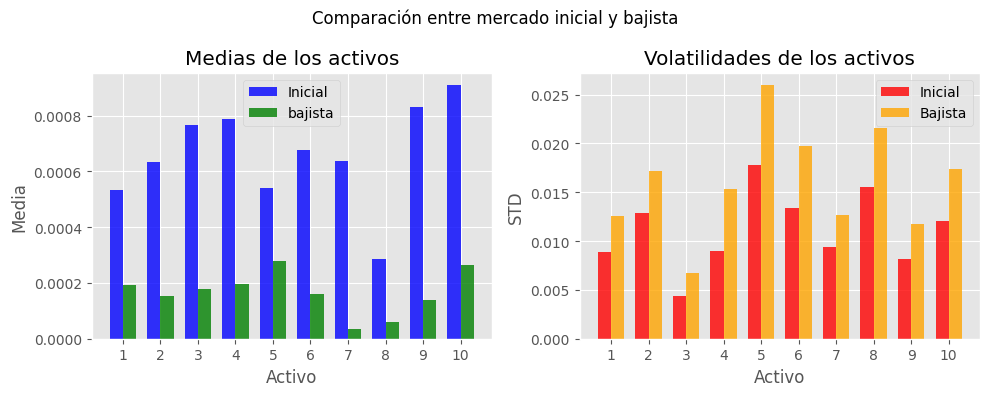

In [ ]:
# Definir las posiciones y ancho de las barras
bar_width = 0.35
index = np.arange(len(med_lst))

# Crear una figura con dos gráficas (1x2)
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# Gráfica 1: Comparación entre med_lst y med_baj_lst
ax[0].bar(index, med_lst, bar_width, label='Inicial', alpha=0.8, color='blue')
ax[0].bar(index + bar_width, med_baj_lst, bar_width, label='bajista', alpha=0.8, color='green')
ax[0].set_xlabel('Activo')
ax[0].set_ylabel('Media')
ax[0].set_title('Medias de los activos')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(range(1, len(med_lst) + 1))
ax[0].legend()

# Gráfica 2: Comparación entre std_lst y std_baja_lst
ax[1].bar(index, std_lst, bar_width, label='Inicial', alpha=0.8, color='red')
ax[1].bar(index + bar_width, std_baja_lst, bar_width, label='Bajista', alpha=0.8, color='orange')
ax[1].set_xlabel('Activo')
ax[1].set_ylabel('STD')
ax[1].set_title('Volatilidades de los activos')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(range(1, len(std_lst) + 1))
ax[1].legend()

plt.suptitle("Comparación entre mercado inicial y bajista")
# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

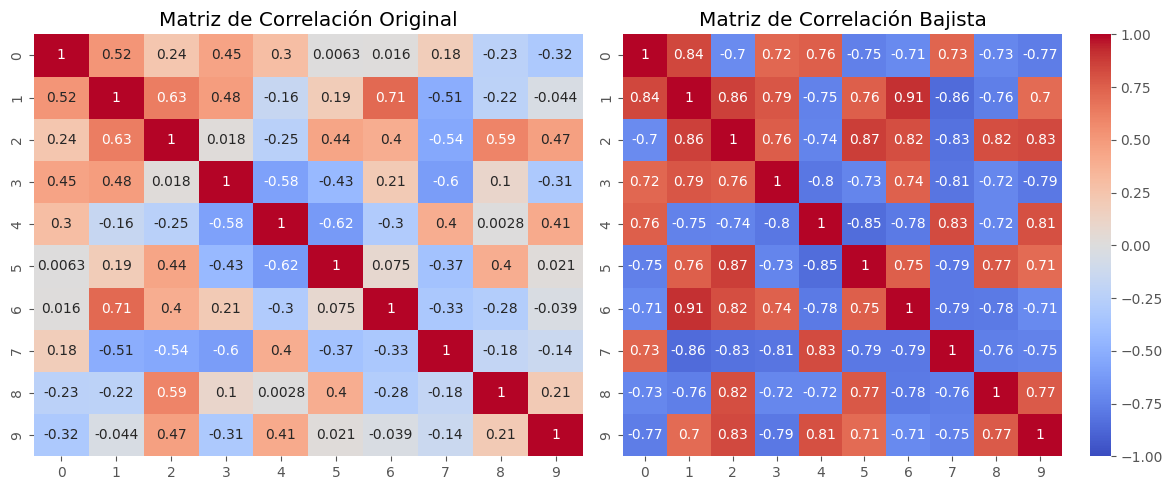

In [ ]:
# Crear una figura y dos subgráficos (1x2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Dibujar las matrices como mapas de calor en los subgráficos
sns.heatmap(corr_mat, ax=ax1, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=False)
sns.heatmap(corr_baj_mat, ax=ax2, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

# Establecer títulos para los subgráficos
ax1.set_title("Matriz de Correlación Original")
ax2.set_title("Matriz de Correlación Bajista")

# Ajustar el diseño de la figura para que todo encaje bien
plt.tight_layout()

# Mostrar la figura
plt.show()

#### Evento bajista severo

In [10]:
start_date_severo = precios_df.index.values[-1] + np.timedelta64(1, 'D')
businees_days_severo = sim.generate_business_dates(num_dias, start_date_severo)

med_norm_lst = list(np.mean(ret_sim, axis=0))
std_norm_lst = list(np.std(ret_sim, axis=0))
corr_norm_mat = np.corrcoef(ret_sim, rowvar=False)

med_severo_lst, std_severo_lst, corr_severo_mat = sim.simular_impacto_severo(med_norm_lst,
                                                                     std_norm_lst,
                                                                     corr_norm_mat,
                                                                     factor_medias = 1.2,
                                                                     factor_vol = 0.4,
                                                                     factor_corr = 0.7)

cov_severo_mat =sim.calcular_matriz_covarianza(med_severo_lst, std_severo_lst, corr_severo_mat)

ret_sim_severo = sim.simular_retornos_diarios(med_severo_lst, std_severo_lst, cov_severo_mat, num_dias)

ret_sim_severo_df = pd.DataFrame(ret_sim_severo, index=businees_days_severo, columns=[f"activo_{i}" for i in range(num_activos)])

precios_severo_ini = precios_df.iloc[-1].values

precios_severo_df = sim.calcular_precios(ret_sim_severo_df, precios_severo_ini)

/home/alfonso/Desktop/universidad/Python-aplicado-gestion-carteras/source/utils_sim_mercado.py:301: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  retornos = np.random.multivariate_normal(media_lst, cov_mat, num_dias)


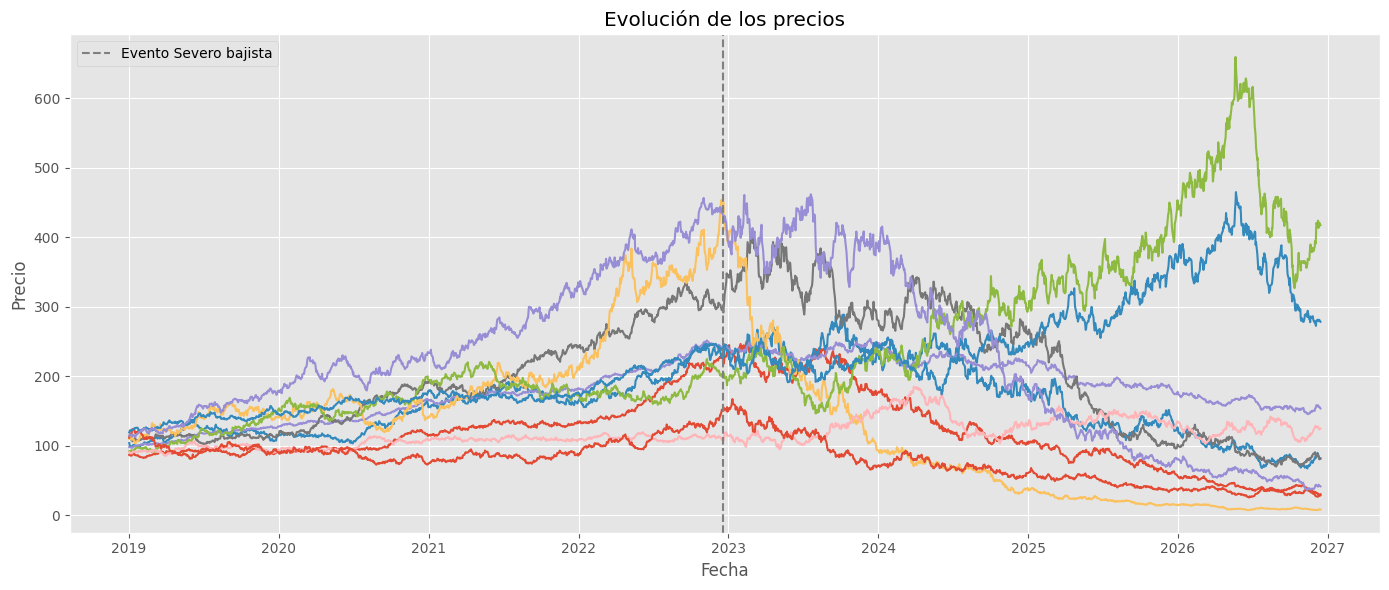

In [12]:
# Concatenar ambos DataFrames
precios_total_df = pd.concat([precios_df, precios_severo_df])

# Representar los precios
plt.figure(figsize=(14, 6))
for columna in precios_total_df.columns:
    plt.plot(precios_total_df.index, precios_total_df[columna])

    # Añadir línea vertical en el último día de precios_df
ultimo_dia = precios_df.index[-1]
plt.axvline(x=ultimo_dia, color='gray', linestyle='--', label='Evento Severo bajista')


plt.title("Evolución de los precios")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

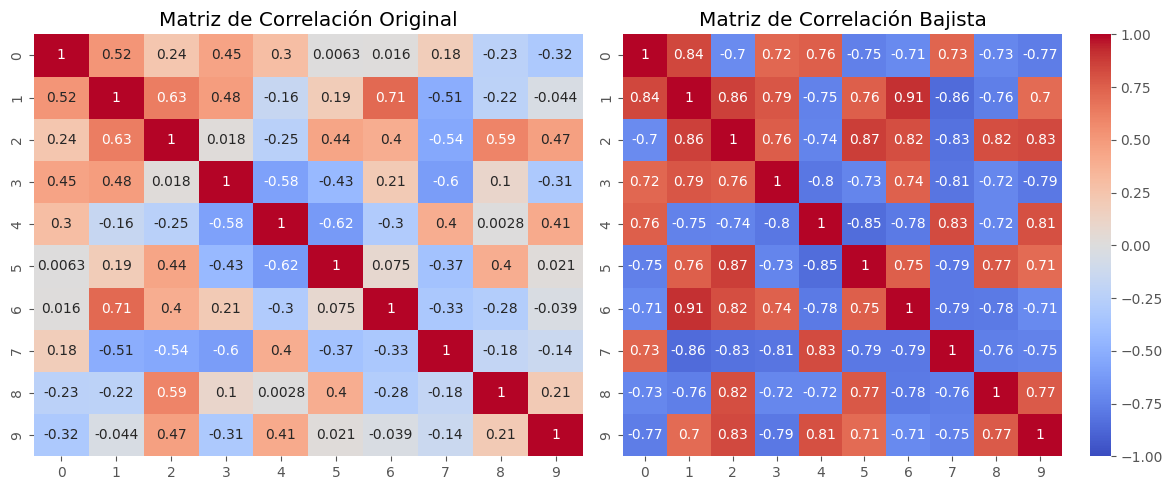

In [14]:
# Crear una figura y dos subgráficos (1x2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Dibujar las matrices como mapas de calor en los subgráficos
sns.heatmap(corr_mat, ax=ax1, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=False)
sns.heatmap(corr_severo_mat, ax=ax2, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

# Establecer títulos para los subgráficos
ax1.set_title("Matriz de Correlación Original")
ax2.set_title("Matriz de Correlación Bajista")

# Ajustar el diseño de la figura para que todo encaje bien
plt.tight_layout()

# Mostrar la figura
plt.show()

In [51]:
corr_baj_mat

array([[6.36151538e-05, 8.94220575e-05, 4.34676825e-05, 5.14889582e-05],
       [8.94220575e-05, 6.46090000e-04, 1.07689398e-04, 4.42611904e-04],
       [4.34676825e-05, 1.07689398e-04, 6.24095130e-05, 3.79374845e-05],
       [5.14889582e-05, 4.42611904e-04, 3.79374845e-05, 3.62650488e-04]])

In [49]:
cov_baj_mat =sim.calcular_matriz_covarianza(med_baj_lst, std_baj_lst, corr_baj_mat)

ret_baj_sim = sim.simular_retornos_diarios(med_baj_lst, std_baj_lst, cov_baj_mat, num_dias)

ret_baj_sim_df = pd.DataFrame(ret_baj_sim, index=businees_days_baja, columns=[f"activo_{i}" for i in range(num_activos)])

precios_baja_ini = precios_df.iloc[-1]

precios_baja_df = sim.calcular_precios(ret_baj_sim_df, precios_baja_ini)

In [19]:
from itertools import product
affected_indices = np.random.choice(5, 3, replace=False)
factor_corr=100
affected_indices

array([2, 3, 4])

In [21]:
corr_mat=np.ones(25).reshape(5, 5)
corr_mat*=3
corr_mat_ajustada = corr_mat.copy()

for i, j in list(product(affected_indices, affected_indices)):
    if i != j and corr_mat[i][j] > 0:
        corr_mat_ajustada[i][j] += factor_corr * (1 - corr_mat[i][j])
    elif i != j and corr_mat[i][j] < 0:
        corr_mat_ajustada[i][j] -= factor_corr * (1 + corr_mat[i][j])

corr_mat_ajustada

array([[   3.,    3.,    3.,    3.,    3.],
       [   3.,    3.,    3.,    3.,    3.],
       [   3.,    3.,    3., -197., -197.],
       [   3.,    3., -197.,    3., -197.],
       [   3.,    3., -197., -197.,    3.]])

<Axes: title={'center': 'Precios simulados'}>

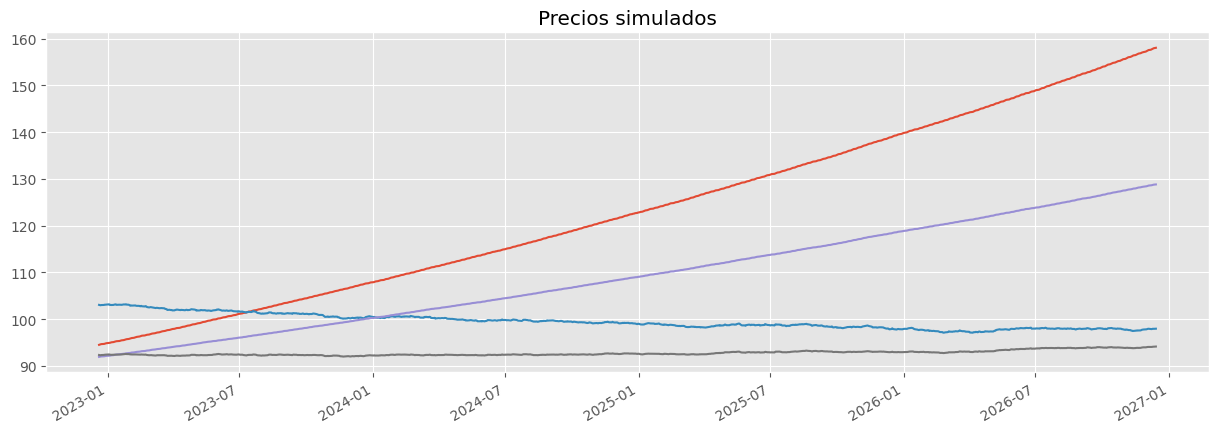

In [45]:
#precios_df = (1 + ret_sim_df).cumprod()
precios_df.plot(figsize=(15, 5), legend=False, title="Precios simulados")


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

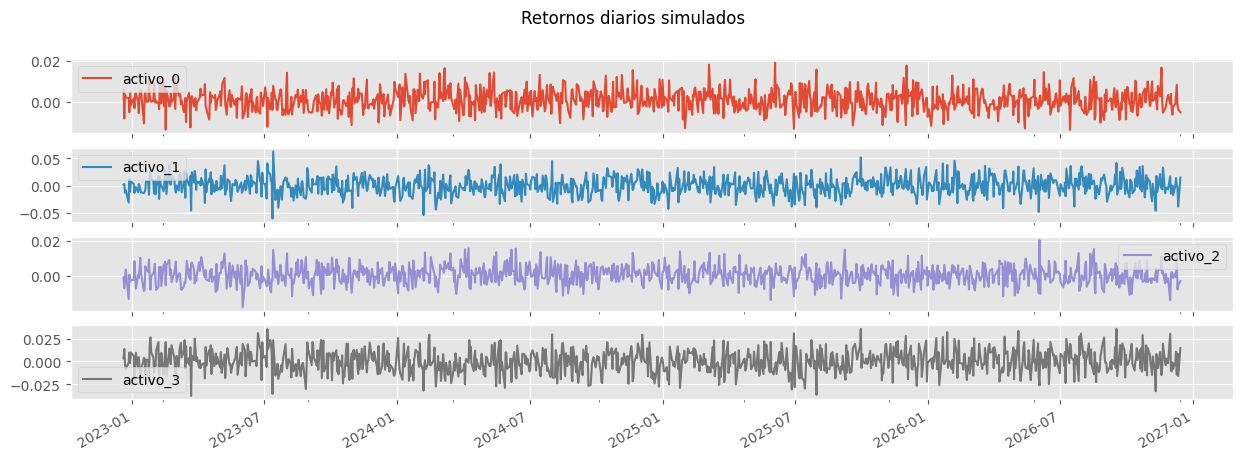

In [46]:
ret_sim_df.plot(figsize=(15, 5), subplots=True, title="Retornos diarios simulados")

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

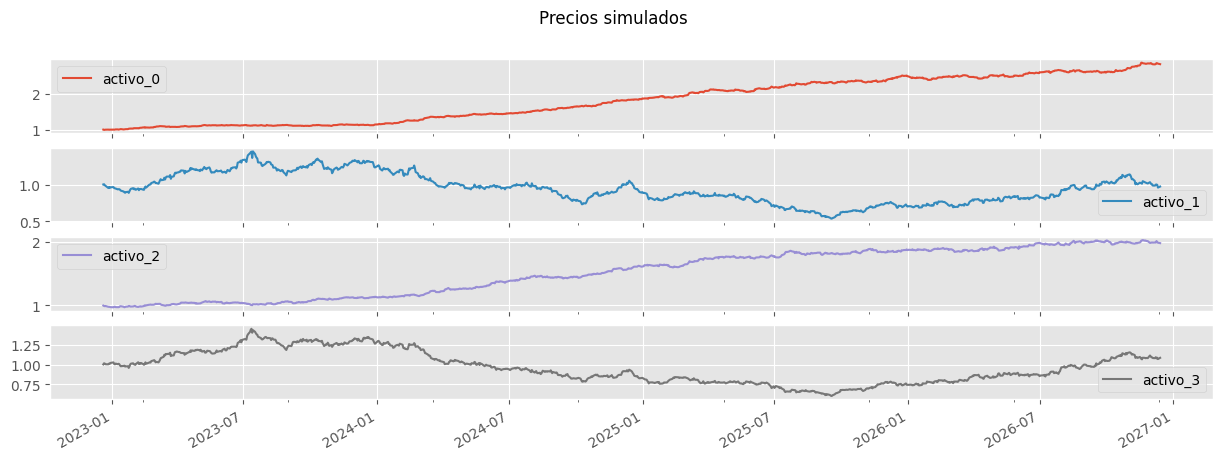

In [47]:
kk = np.exp(ret_sim_df.cumsum())
kk.plot(figsize=(15, 5), subplots=True, title="Precios simulados")